Exploring Timeline

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
zip_ts = pd.read_csv('../data/raw/unzipped/Zip_time_series.csv')

In [3]:
zip_ts.head()

,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68700.0,67000.0,101900.0,107000.0,124800.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97000.0,81300.0,135200.0,145800.0,213600.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85400.0,NaN,101200.0,101200.0,125700.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97900.0,87600.0,124000.0,125000.0,162100.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81100.0,NaN,109300.0,109300.0,148100.0,NaN,NaN,NaN,NaN,NaN


In [4]:
zip_ts['Date'].unique()

array(['1996-04-30', '1996-05-31', '1996-06-30', '1996-07-31',
       '1996-08-31', '1996-09-30', '1996-10-31', '1996-11-30',
       '1996-12-31', '1997-01-31', '1997-02-28', '1997-03-31',
       '1997-04-30', '1997-05-31', '1997-06-30', '1997-07-31',
       '1997-08-31', '1997-09-30', '1997-10-31', '1997-11-30',
       '1997-12-31', '1998-01-31', '1998-02-28', '1998-03-31',
       '1998-04-30', '1998-05-31', '1998-06-30', '1998-07-31',
       '1998-08-31', '1998-09-30', '1998-10-31', '1998-11-30',
       '1998-12-31', '1999-01-31', '1999-02-28', '1999-03-31',
       '1999-04-30', '1999-05-31', '1999-06-30', '1999-07-31',
       '1999-08-31', '1999-09-30', '1999-10-31', '1999-11-30',
       '1999-12-31', '2000-01-31', '2000-02-29', '2000-03-31',
       '2000-04-30', '2000-05-31', '2000-06-30', '2000-07-31',
       '2000-08-31', '2000-09-30', '2000-10-31', '2000-11-30',
       '2000-12-31', '2001-01-31', '2001-02-28', '2001-03-31',
       '2001-04-30', '2001-05-31', '2001-06-30', '2001-

In [5]:
zip_ts.dtypes

Date                                     object
RegionName                                int64
InventorySeasonallyAdjusted_AllHomes    float64
InventoryRaw_AllHomes                   float64
MedianListingPricePerSqft_1Bedroom      float64
                                         ...   
ZRI_AllHomes                            float64
ZRI_AllHomesPlusMultifamily             float64
ZriPerSqft_AllHomes                     float64
Zri_MultiFamilyResidenceRental          float64
Zri_SingleFamilyResidenceRental         float64
Length: 76, dtype: object

In [6]:
#from datetime import date
from datetime import datetime
from dateutil.parser import parse

In [7]:
isinstance(zip_ts['Date'], datetime)

False

In [8]:
zip_ts['Date']= zip_ts['Date'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d"))

In [9]:
zip_ts.head(100)

,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68700.0,67000.0,101900.0,107000.0,124800.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97000.0,81300.0,135200.0,145800.0,213600.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85400.0,NaN,101200.0,101200.0,125700.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97900.0,87600.0,124000.0,125000.0,162100.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81100.0,NaN,109300.0,109300.0,148100.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1996-04-30,1431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93300.0,NaN,117200.0,117200.0,154500.0,NaN,NaN,NaN,NaN,NaN
96,1996-04-30,1432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89700.0,86300.0,124100.0,131300.0,172300.0,NaN,NaN,NaN,NaN,NaN
97,1996-04-30,1440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61000.0,NaN,79300.0,82200.0,102000.0,NaN,NaN,NaN,NaN,NaN
98,1996-04-30,1450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,144600.0,140700.0,214000.0,219100.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
zip_ts.dtypes

Date                                    datetime64[ns]
RegionName                                       int64
InventorySeasonallyAdjusted_AllHomes           float64
InventoryRaw_AllHomes                          float64
MedianListingPricePerSqft_1Bedroom             float64
                                             ...      
ZRI_AllHomes                                   float64
ZRI_AllHomesPlusMultifamily                    float64
ZriPerSqft_AllHomes                            float64
Zri_MultiFamilyResidenceRental                 float64
Zri_SingleFamilyResidenceRental                float64
Length: 76, dtype: object

In [11]:
zip_ts_single_fam = zip_ts.rename(columns={'Date': 'ds',
                        'ZHVI_SingleFamilyResidence': 'y'})

In [12]:
zip_ts_single_fam.head()

,ds,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,y,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68700.0,67000.0,101900.0,107000.0,124800.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97000.0,81300.0,135200.0,145800.0,213600.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85400.0,NaN,101200.0,101200.0,125700.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97900.0,87600.0,124000.0,125000.0,162100.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81100.0,NaN,109300.0,109300.0,148100.0,NaN,NaN,NaN,NaN,NaN


In [13]:
bed1zip1 = zip_ts_single_fam.loc[zip_ts_single_fam['RegionName'] == 91770]
bed1zip1

,ds,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,y,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
12045,1996-04-30,91770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,134200.0,135800.0,151600.0,152300.0,NaN,NaN,NaN,NaN,NaN,NaN
25809,1996-05-31,91770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,135500.0,134300.0,153200.0,153700.0,NaN,NaN,NaN,NaN,NaN,NaN
39626,1996-06-30,91770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,135800.0,133500.0,154200.0,154800.0,NaN,NaN,NaN,NaN,NaN,NaN
53452,1996-07-31,91770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,135500.0,132700.0,154800.0,155600.0,NaN,NaN,NaN,NaN,NaN,NaN
67293,1996-08-31,91770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,135000.0,131500.0,155100.0,156100.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305943,2017-08-31,91770,39.0,41.0,NaN,NaN,NaN,NaN,NaN,389.632782,...,487900.0,429100.0,550400.0,557100.0,690400.0,2440.0,2430.0,1.810,2362.0,2443.0
4324990,2017-09-30,91770,34.0,37.0,NaN,NaN,NaN,NaN,NaN,384.097035,...,494100.0,434500.0,554900.0,560800.0,697200.0,2436.0,2429.0,1.814,2361.0,2441.0
4344037,2017-10-31,91770,33.0,35.0,NaN,NaN,NaN,NaN,NaN,389.150943,...,499900.0,440700.0,558600.0,564300.0,705400.0,2433.0,2426.0,1.816,2368.0,2439.0
4363084,2017-11-30,91770,33.0,36.0,NaN,NaN,NaN,NaN,NaN,370.544160,...,504300.0,449000.0,563100.0,569700.0,718400.0,2436.0,2430.0,1.818,2374.0,2444.0


In [14]:
split_date = '2015-11-30'
zip_train = bed1zip1.loc[bed1zip1['ds'] <= split_date].copy()
zip_test = bed1zip1.loc[bed1zip1['ds'] > split_date].copy()

In [15]:
my_model = Prophet(interval_width=0.95)
my_model.fit(zip_train)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
forecast = my_model.predict(zip_test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
20,2017-08-31,574388.291299,499164.173589,642513.088530
21,2017-09-30,577640.615425,496929.088303,654552.430141
22,2017-10-31,580876.727155,496455.724056,661294.127611
23,2017-11-30,583896.405230,490194.405856,662970.257763
24,2017-12-31,587242.070609,489393.268169,676326.559944


In [34]:
#my_model.plot(forecast, uncertainty=True)

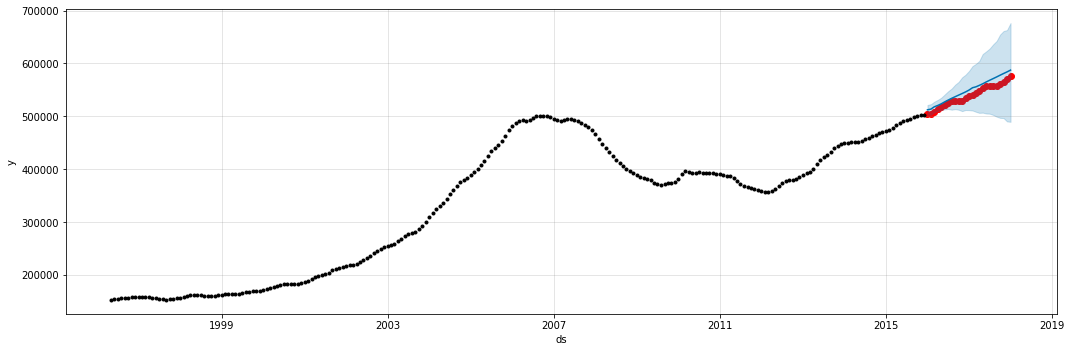

In [19]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(zip_test['ds'], zip_test['y'], color='r')
fig = my_model.plot(forecast, ax=ax)
plt.show()

In [20]:
mean_squared_error(y_true=zip_test['y'],
                   y_pred=forecast['yhat'])

126488050.71072857

In [21]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=zip_test['y'],
                   y_pred=forecast['yhat'])

1.9765422511847726

**Okay now lets try it without any null values** 

In [22]:
zip_ts_single_fam_no_na = zip_ts_single_fam[zip_ts_single_fam['y'].notna()]
zip_ts_single_fam_no_na.head()

,ds,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,y,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68700.0,67000.0,101900.0,107000.0,124800.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97000.0,81300.0,135200.0,145800.0,213600.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85400.0,NaN,101200.0,101200.0,125700.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97900.0,87600.0,124000.0,125000.0,162100.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81100.0,NaN,109300.0,109300.0,148100.0,NaN,NaN,NaN,NaN,NaN


In [23]:
zip_ts_single_fam.isnull().sum()

ds                                            0
RegionName                                    0
InventorySeasonallyAdjusted_AllHomes    3332781
InventoryRaw_AllHomes                   3332781
MedianListingPricePerSqft_1Bedroom      4375691
                                         ...   
ZRI_AllHomes                            3046523
ZRI_AllHomesPlusMultifamily             3044532
ZriPerSqft_AllHomes                     3129916
Zri_MultiFamilyResidenceRental          3660343
Zri_SingleFamilyResidenceRental         3049564
Length: 76, dtype: int64

In [24]:
bed1zip1_na = zip_ts_single_fam_no_na.loc[zip_ts_single_fam_no_na['RegionName'] == 91770]
bed1zip1_na

,ds,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,y,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
12045,1996-04-30,91770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,134200.0,135800.0,151600.0,152300.0,NaN,NaN,NaN,NaN,NaN,NaN
25809,1996-05-31,91770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,135500.0,134300.0,153200.0,153700.0,NaN,NaN,NaN,NaN,NaN,NaN
39626,1996-06-30,91770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,135800.0,133500.0,154200.0,154800.0,NaN,NaN,NaN,NaN,NaN,NaN
53452,1996-07-31,91770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,135500.0,132700.0,154800.0,155600.0,NaN,NaN,NaN,NaN,NaN,NaN
67293,1996-08-31,91770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,135000.0,131500.0,155100.0,156100.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305943,2017-08-31,91770,39.0,41.0,NaN,NaN,NaN,NaN,NaN,389.632782,...,487900.0,429100.0,550400.0,557100.0,690400.0,2440.0,2430.0,1.810,2362.0,2443.0
4324990,2017-09-30,91770,34.0,37.0,NaN,NaN,NaN,NaN,NaN,384.097035,...,494100.0,434500.0,554900.0,560800.0,697200.0,2436.0,2429.0,1.814,2361.0,2441.0
4344037,2017-10-31,91770,33.0,35.0,NaN,NaN,NaN,NaN,NaN,389.150943,...,499900.0,440700.0,558600.0,564300.0,705400.0,2433.0,2426.0,1.816,2368.0,2439.0
4363084,2017-11-30,91770,33.0,36.0,NaN,NaN,NaN,NaN,NaN,370.544160,...,504300.0,449000.0,563100.0,569700.0,718400.0,2436.0,2430.0,1.818,2374.0,2444.0


In [25]:
split_date = '2015-11-30'
zip_train_na = bed1zip1_na.loc[bed1zip1_na['ds'] <= split_date].copy()
zip_test_na = bed1zip1_na.loc[bed1zip1_na['ds'] > split_date].copy()

In [26]:
my_model_na = Prophet(interval_width=0.95)
my_model_na.fit(zip_train_na)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
forecast_na = my_model_na.predict(zip_test_na)
forecast_na[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
20,2017-08-31,574388.291299,502922.478594,647881.030717
21,2017-09-30,577640.615425,500165.659373,659860.104701
22,2017-10-31,580876.727155,499293.685615,665725.064168
23,2017-11-30,583896.405230,498738.186888,672681.923994
24,2017-12-31,587242.070609,496077.951580,678340.902642


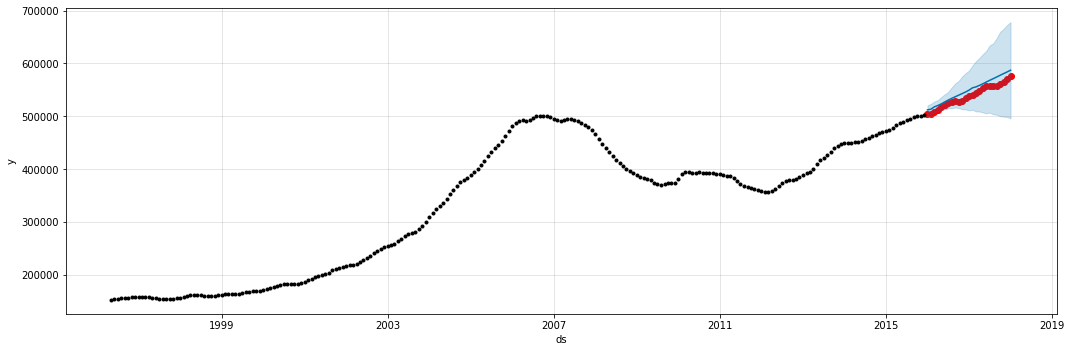

In [29]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(zip_test_na['ds'], zip_test_na['y'], color='r')
fig_na = my_model.plot(forecast_na, ax=ax)
plt.show()

In [32]:
mean_absolute_percentage_error(y_true=zip_test_na['y'],
                   y_pred=forecast_na['yhat'])

1.9765422511847726

I'm getting the same error for both with and without the na removed. * Assuming this may be because it just removes NA values before it runs.

- Need to look into more about the missing months
- Maybe look at comparing a zip code data were there are more vs less missing month/years